<a href="https://colab.research.google.com/github/zkinard/CS-4410-Intro-to-Machine-Learning/blob/main/KinardWeek7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Import Hamlet text and load data
!pip install requests
import requests
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

from textblob import TextBlob
blob = TextBlob(data)

In [39]:
#Import stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [40]:
#Remove stop words from word count
items = blob.word_counts.items()
items = [item for item in items if item[0] not in stop_words]

In [41]:
#Sort words
from operator import itemgetter
sorted_items = sorted(items, key = itemgetter(1), reverse=True)
top20 = sorted_items[1:21]

In [42]:
#Show top 20 words
import pandas as pd
df = pd.DataFrame(top20, columns=['word', 'count'])
df

,word,count
0,lord,211
1,haue,175
2,king,173
3,shall,107
4,hamlet,106
5,come,106
6,thou,105
7,let,104
8,good,99
9,hor,95


<bound method Figure.tight_layout of <Figure size 640x480 with 1 Axes>>

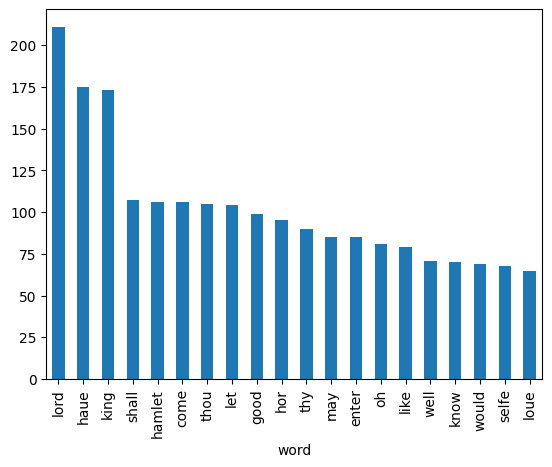

In [43]:
#Make bar graph of top 20 words
axes = df.plot.bar(x='word', y='count', legend=False)
import matplotlib.pyplot as plt
plt.gcf().tight_layout

In [44]:
#Import shape
import imageio
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

#Import Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 1000,
                      colormap = 'prism', mask = mask_image, background_color = 'white')

<ipython-input-44-1eeed02dda40>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


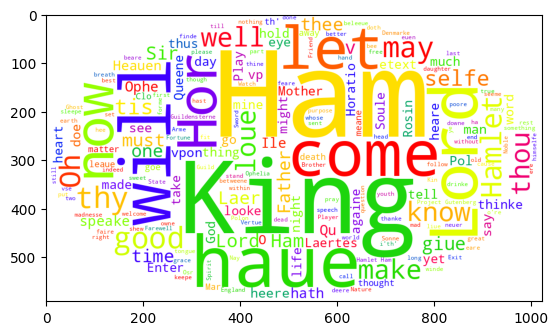

In [45]:
#Generate Word Cloud
wordcloud = wordcloud.generate(data)
%matplotlib inline
plt.imshow(wordcloud)